__Google Stock Predictions using Linear Regression__

In [4]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Loading the csv file from the file location dataset
df=pd.read_csv('GOOG.csv')
#Printing the over view of the raw data set
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,26.378078,26.490770,26.133251,26.168653,26.168653,28951268
1,2015-01-05,26.091366,26.144720,25.582764,25.623152,25.623152,41196796
2,2015-01-06,25.679497,25.738087,24.983908,25.029282,25.029282,57998800
3,2015-01-07,25.280592,25.292759,24.914099,24.986401,24.986401,41301082
4,2015-01-08,24.831326,25.105074,24.482782,25.065184,25.065184,67071641


In [7]:
df.shape

(2347, 7)

In [8]:
#Checking for any null value
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

<Axes: >

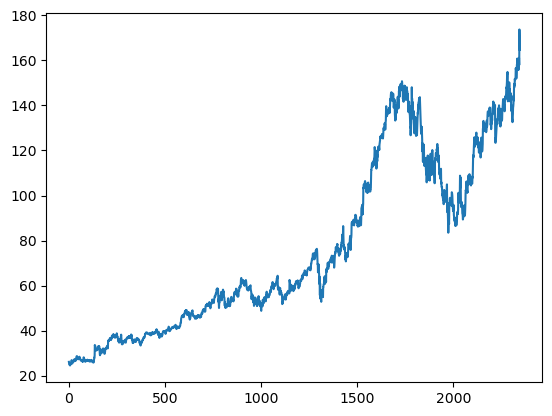

In [10]:
df['Close'].plot()

__Heap Map for Visulization Correlations__

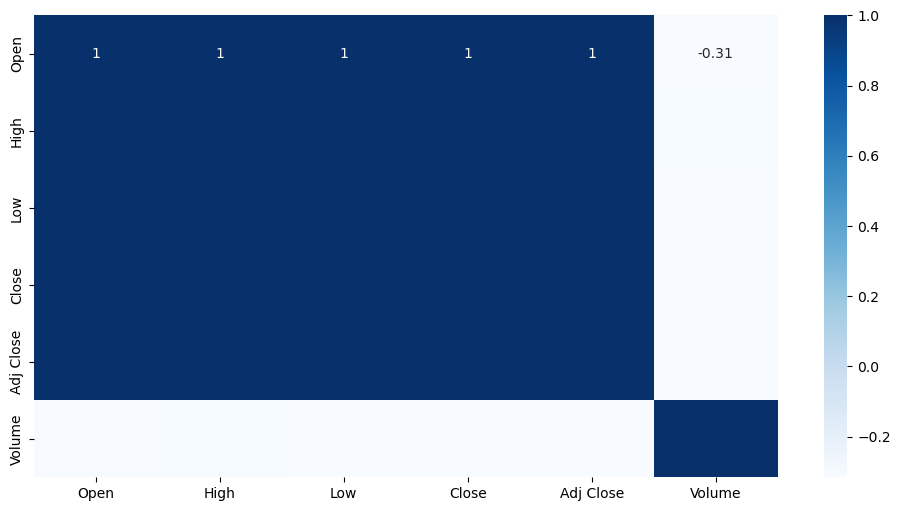

In [19]:
#Select numerical columns
numeric_df=df.select_dtypes(include=[np.number])
plt.figure(figsize=(12,6))
sns.heatmap(numeric_df.corr(),cmap="Blues",annot=True)
plt.show()

__Split Data for Testing__

In [17]:
#Splitting the datasets
#Set indepenfent variables
x=df[['Open','High','Low','Volume']].values
#Set dependent variables
y=df['Close'].values

__Split the data 80% train and 20% testing__ 

In [23]:
from sklearn.model_selection import train_test_split
#Splitting the data 80% train and 20% testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

__Training the Model for Linear Prediction__

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import statsmodels.api as sm

#Creating Regression Model 
regressor=LinearRegression()
#Fit linear regression model
model=regressor.fit(x_train,y_train)
#Use model to make predictions
y_pred=regressor.predict(x_test)

In [28]:
predicted=y_pred
dframe=pd.DataFrame(y_test,predicted)
dfr=pd.DataFrame({'Actual_Price':y_test,'Predicted_Price':predicted})
print(dfr)

     Actual_Price  Predicted_Price
0       36.804501        36.717807
1      132.389999       132.350489
2       25.020805        24.934645
3      122.879997       122.544022
4      114.664497       113.588931
..            ...              ...
465     53.301998        53.274796
466     46.325001        46.402365
467     90.927498        90.432168
468     26.306774        26.274778
469     53.851501        53.621741

[470 rows x 2 columns]


__Prediction Table of Actual Prices vs Predicted values__

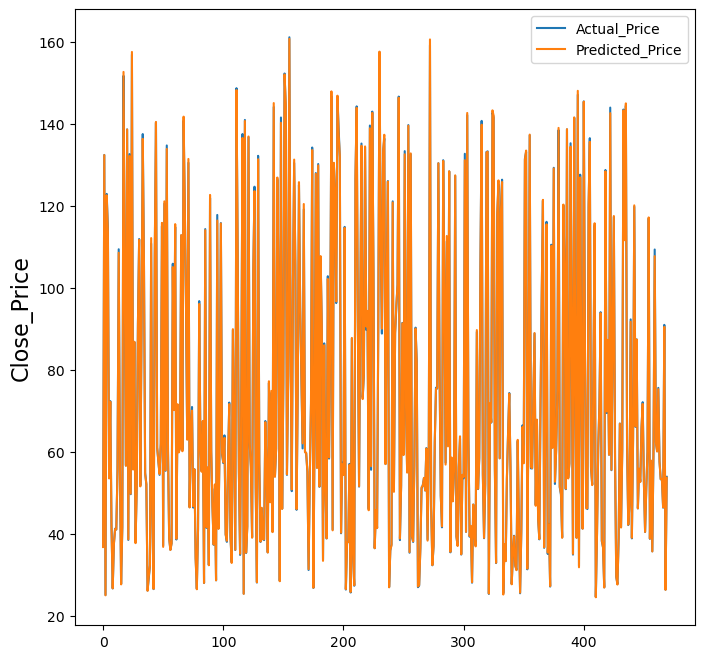

In [29]:
plt.figure(figsize=(8,8))
plt.plot(dfr)
plt.ylabel('Close_Price',fontsize=16)
plt.legend(['Actual_Price','Predicted_Price'])
plt.show()


<Axes: >

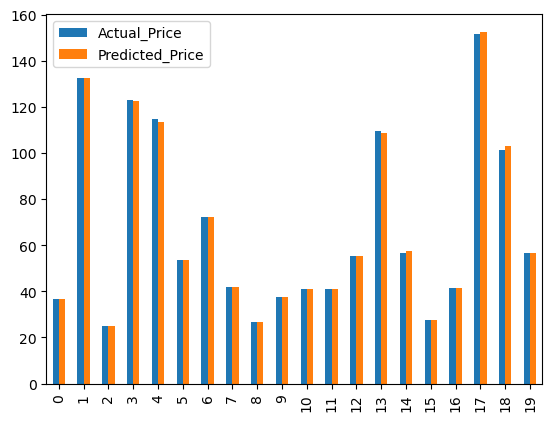

In [31]:
#bar graph for 20 values
graph=dfr.head(20)
graph.plot(kind='bar')


__Evaluting the model -The closer to zero for all metrics the better__

In [35]:
import math
from sklearn import metrics
print('Mean Absolute Error :',metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error :',metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error :',math.sqrt(metrics.mean_absolute_error(y_test,predicted)))



Mean Absolute Error : 0.3120672724701683
Mean Squared Error : 0.20129163135661496
Root Mean Squared Error : 0.5586298170257011


__Model Accuracy__

In [36]:
x2=abs(predicted-y_test)
y2=100*(x2/y_test)
accuracy=100-np.mean(y2)
print('Accuracy: ',round(accuracy,2),'%')

Accuracy:  99.59 %
